## Analysis Notebook

This notebook runs some various analyses on outputs of statistics .csv files
Note that the .csv files are expected to have the following format, and need to include the header as well in the first line:

```
frameNum,status,unitID,unitDefID,unitTeam,unitName
```

In [ ]:
%pip install pandas
%pip install matplotlib

In [135]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

45 csv files (i.e. replays) analyzed


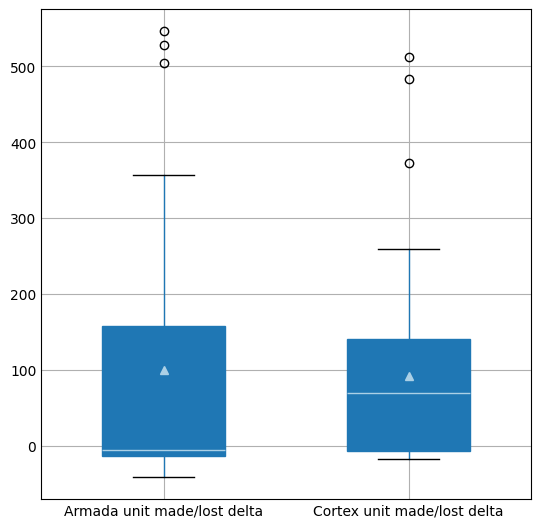

In [136]:
armDeltas = []
corDeltas = []

def analyzeTeam(df):
    f = df[df['status'].eq('finished')]
    d = df[df['status'].eq('destroyed')]
    delta = len(f) - len(d)
    
    isArm = df.iloc[0].unitName.startswith('arm')
    isCor = df.iloc[0].unitName.startswith('cor')
    if isArm:
        armDeltas.append(delta)
    if isCor:
        corDeltas.append(delta)

def analyze(filepath):
    df = pd.read_csv("./analysis_data/" + filepath)
    analyzeTeam(df[df['unitTeam'].eq(0)])
    analyzeTeam(df[df['unitTeam'].eq(1)])

def collect_analyses():
    deltas = pd.DataFrame({'Armada unit made/lost delta': pd.Series(armDeltas, name="ham"), 'Cortex unit made/lost delta': pd.Series(corDeltas)})
    p = deltas.boxplot(figsize=(5,5), widths=0.5, patch_artist=True, showmeans=True, showfliers=True)
    


analysis_datafiles = os.listdir("./analysis_data")
print(len(analysis_datafiles), "csv files (i.e. replays) analyzed")
for f in analysis_datafiles:
    analyze(f)
collect_analyses()